<a href="https://colab.research.google.com/github/talalba/ML_exercises-/blob/master/prob_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread
from sklearn.model_selection import train_test_split
from pandas import read_excel
import cv2
import pathlib
import multiprocessing
import importlib
import locale
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
# drive.mount('/content/drive')
import gzip
from numpy.linalg import norm
from numpy import dot
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
data_path = '/content/drive/My Drive/exercise/newsgroups/'

# load the data
modifiedterms = pd.read_csv(data_path+'modifiedterms.txt',sep='\t',header=None)

train_data = pd.read_csv(data_path+'trainMatrixModified.txt',sep='\t',header=None)
test_data = pd.read_csv(data_path+'testMatrixModified.txt',sep='\t',header=None)
train_labels = pd.read_csv(data_path+'trainClasses.txt',sep='\t',header=None)
test_labels = pd.read_csv(data_path+'testClasses.txt',sep='\t',header=None)

# display the head of the train data
display(train_data.head())
display(test_data.head())
display(train_labels.head())
display(test_labels.head())
display(modifiedterms.head())

# check the dimnesions of the data
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)
print(modifiedterms.shape)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,26.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,36.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


,0,1
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1


,0
0,david
1,rex
2,wood
3,subject
4,call


(5500, 800)
(5500, 200)
(800, 2)
(200, 2)
(5500, 1)


In [0]:
# create KNN classifier
def knn_classifier(train_data2,train_labels2,test_data_instance,K,distance_type):

  distances = []

  if distance_type == 'euclidean':
    for index in range(train_data2.shape[1]):
      dist = np.linalg.norm(np.array(test_data_instance) - np.array(train_data2[index]))
      distances.append((index,dist, train_labels2.iloc[index,1]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:K]

  elif distance_type == 'cosine':

    for index in range(train_data2.shape[1]):
        dist = 1 - dot(np.array(test_data_instance), np.array(train_data2[index]))/(norm(np.array(test_data_instance))*norm(np.array(train_data2[index])))
        distances.append((index, dist, train_labels2.iloc[index,1]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:K]
    

  # predicted class is the one with the maxmimum votes 
  predicted_class_labels = [elem[2] for elem in neighbors]
  counts = np.bincount(predicted_class_labels)
  predicted_class = np.argmax(counts)

  return neighbors , predicted_class

    

In [0]:
# get classification accuracy

def get_classification_accuracy(train_data,train_labels,test_data,test_labels,K,distance_type):

  predicted_labels = []

  for index in (range(test_data.shape[1])):
      
    neighbors, predicted_class = knn_classifier(train_data,train_labels,test_data[index],K,distance_type)

    predicted_labels.append(predicted_class)

  # compute accuracy 
  accuracy = np.sum(predicted_labels==np.array(test_labels.iloc[:,1]))/len(predicted_labels)
  return accuracy





100%|██████████| 19/19 [07:12<00:00, 22.75s/it]


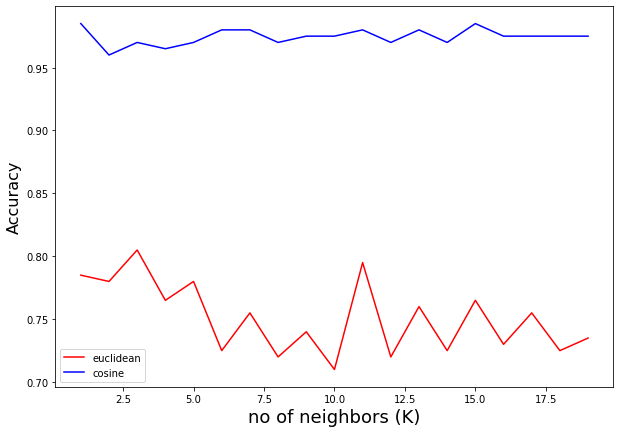

In [283]:
# get accuracy as a fucntion of K
accuracy_euc_list = []
accuracy_cos_list = []

for K in tqdm(range(1,20)):

  accuracy_euc = get_classification_accuracy(train_data,train_labels,test_data,test_labels,K,'euclidean')

  accuracy_cos = get_classification_accuracy(train_data,train_labels,test_data,test_labels,K,'cosine')

  accuracy_euc_list.append(accuracy_euc)
  accuracy_cos_list.append(accuracy_cos)

# plot the accuracy as a function of K
plt.rcParams["figure.figsize"]=10,7
plt.plot(list(range(1, len(accuracy_euc_list)+1)),accuracy_euc_list,color='red', label='euclidean')
plt.plot(list(range(1, len(accuracy_cos_list)+1)),accuracy_cos_list,color='blue', label='cosine')
plt.xlabel('no of neighbors (K)', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend()
plt.show()



In [51]:
# use TFxIDF

# get term frequency
tf_train_data = train_data/train_data.sum(axis=0)
tf_test_data = test_data/test_data.sum(axis=0)

# get inverse document frequency 
idf_train_data = np.log2(train_data.shape[1]/train_data.apply(lambda x: (x > 0).sum(), axis=1))
idf_test_data = np.log2(test_data.shape[1]/test_data.apply(lambda x: (x > 0).sum(), axis=1))

test_data.iloc[1,:].sum()

# get TFxIDF
tfidf_train_data = tf_train_data.mul(idf_train_data, axis=0)
tfidf_test_data = tf_test_data.mul(idf_test_data, axis=0)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,0.059317,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.23356,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.042466,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.173142,0.0,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005352,0.0,0.0,0.178389,0.0,0.0,0.062626,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.033448,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.022642,0.0,0.000000,0.0,0.019888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.089101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.066468,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

100%|██████████| 19/19 [07:32<00:00, 23.80s/it]


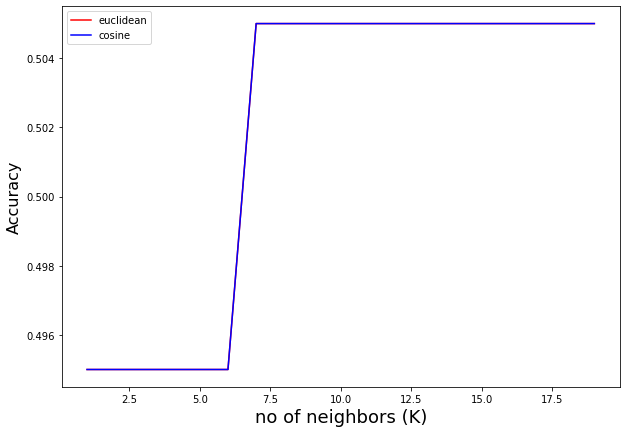

In [18]:
# get accuracy as a fucntion of K
accuracy_euc_list = []
accuracy_cos_list = []

for K in tqdm(range(1,20)):

  accuracy_euc = get_classification_accuracy(tfidf_train_data,train_labels,tfidf_test_data,test_labels,K,'euclidean')

  accuracy_cos = get_classification_accuracy(tfidf_train_data,train_labels,tfidf_test_data,test_labels,K,'cosine')

  accuracy_euc_list.append(accuracy_euc)
  accuracy_cos_list.append(accuracy_cos)

# plot the accuracy as a function of K
plt.rcParams["figure.figsize"]=10,7
plt.plot(list(range(1, len(accuracy_euc_list)+1)),accuracy_euc_list,color='red', label='euclidean')
plt.plot(list(range(1, len(accuracy_cos_list)+1)),accuracy_cos_list,color='blue', label='cosine')
plt.xlabel('no of neighbors (K)', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend()
plt.show()

In [0]:
# Rocchio method
def train_rocchio(train_data2,train_labels2):

  # construct prototypes

  # pos class has label 1, neg class has label 0

  train_data_pos = train_data.iloc[:,(train_labels.iloc[:,1]==1).values].sum(axis=1)
  train_data_neg = train_data.iloc[:,(train_labels.iloc[:,1]==0).values].sum(axis=1)

  return train_data_pos, train_data_neg




In [0]:
def test_rocchio(train_data_pos,train_data_neg,test_data_instance):

    # class 1(pos class has label 1), class 2 (neg class has label 0)

    dist1 = 1 - dot(np.array(test_data_instance), np.array(train_data_pos))/(norm(np.array(test_data_instance))*norm(np.array(train_data_pos)))
    dist2 = 1 - dot(np.array(test_data_instance), np.array(train_data_neg))/(norm(np.array(test_data_instance))*norm(np.array(train_data_neg)))

    if (dist1 < dist2):
      predicted_class = 1
    else:
      predicted_class = 0

    return np.append(dist1,dist2), predicted_class


In [124]:
# get protoypes from tarining data
pro1, pro2 = train_rocchio(train_data,train_labels)

# get classification accuracy
predicted_labels = []
for index in tqdm(range(test_data.shape[1])):
    
  score, predicted_class = test_rocchio(pro1,pro2,test_data[index])

  predicted_labels.append(predicted_class)


100%|██████████| 200/200 [00:00<00:00, 6104.54it/s]


In [127]:
# compute accuracy 
accuracy = np.sum(predicted_labels==np.array(test_labels.iloc[:,1]))/len(predicted_labels)
print('rocchio accuracy = '+ accuracy.astype(str))



rocchio accuracy = 0.975


# comparable accuracy to KNN though much faster in training